## EMA 
The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.

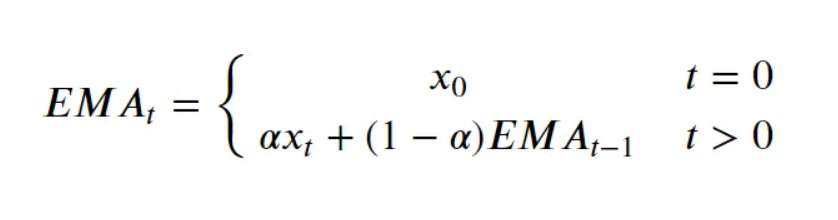

**xₜ is the observation at the time period t. EMAₜ is the exponential moving average at the time period t. α is the smoothing factor. The smoothing factor has a value between 0 and 1 and represents the weighting applied to the most recent period.**

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [86]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']

#It is annual data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN,JNJ]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","J&J"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-26,160.429993,160.740005,159.360001,159.500000,159.500000,5591900,J&J
2024-01-29,159.009995,160.070007,158.960007,159.360001,159.360001,6483200,J&J
2024-01-30,159.350006,159.759995,158.130005,158.770004,158.770004,7200500,J&J
2024-01-31,160.399994,160.619995,158.669998,158.899994,158.899994,8256800,J&J
2024-02-01,158.160004,158.490005,157.050003,158.360001,158.360001,8012000,J&J
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J
2024-02-07,157.800003,159.369995,157.690002,157.979996,157.979996,8690300,J&J


In [87]:
df['Date'] = df.index
df

,Open,High,Low,Close,Adj Close,Volume,company_name,Date
Date,,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031387,56007100,APPLE,2023-02-09
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399902,57450700,APPLE,2023-02-10
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,2023-02-13
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,2023-02-14
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,2023-02-15
...,...,...,...,...,...,...,...,...
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,2024-02-02
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,2024-02-05
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,2024-02-06


In [88]:
data = pd.DataFrame()
EMA_alpha = [0.1,0.3]
for company in company_list:
    company['Date'] = company.index
    for alpha in EMA_alpha:    
        column_name = f'EMA_{alpha}'
        company[column_name] = company['Adj Close'].ewm(alpha = alpha, adjust = False).mean()
    data = pd.concat([data,company],axis = 0,ignore_index=True)  
data

,Open,High,Low,Close,Adj Close,Volume,company_name,Date,EMA_0.1,EMA_0.3
0,153.779999,154.330002,150.419998,150.869995,150.031387,56007100,APPLE,2023-02-09,150.031387,150.031387
1,149.460007,151.339996,149.220001,151.009995,150.399902,57450700,APPLE,2023-02-10,150.068239,150.141942
2,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,2023-02-13,150.384259,151.067891
3,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,2023-02-14,150.603938,151.521840
4,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,2023-02-15,151.013790,152.476024
...,...,...,...,...,...,...,...,...,...,...
1250,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,2024-02-02,159.177955,158.299034
1251,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,2024-02-05,158.840160,157.549325
1252,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,2024-02-06,158.762143,157.702527
1253,157.800003,159.369995,157.690002,157.979996,157.979996,8690300,J&J,2024-02-07,158.683929,157.785767


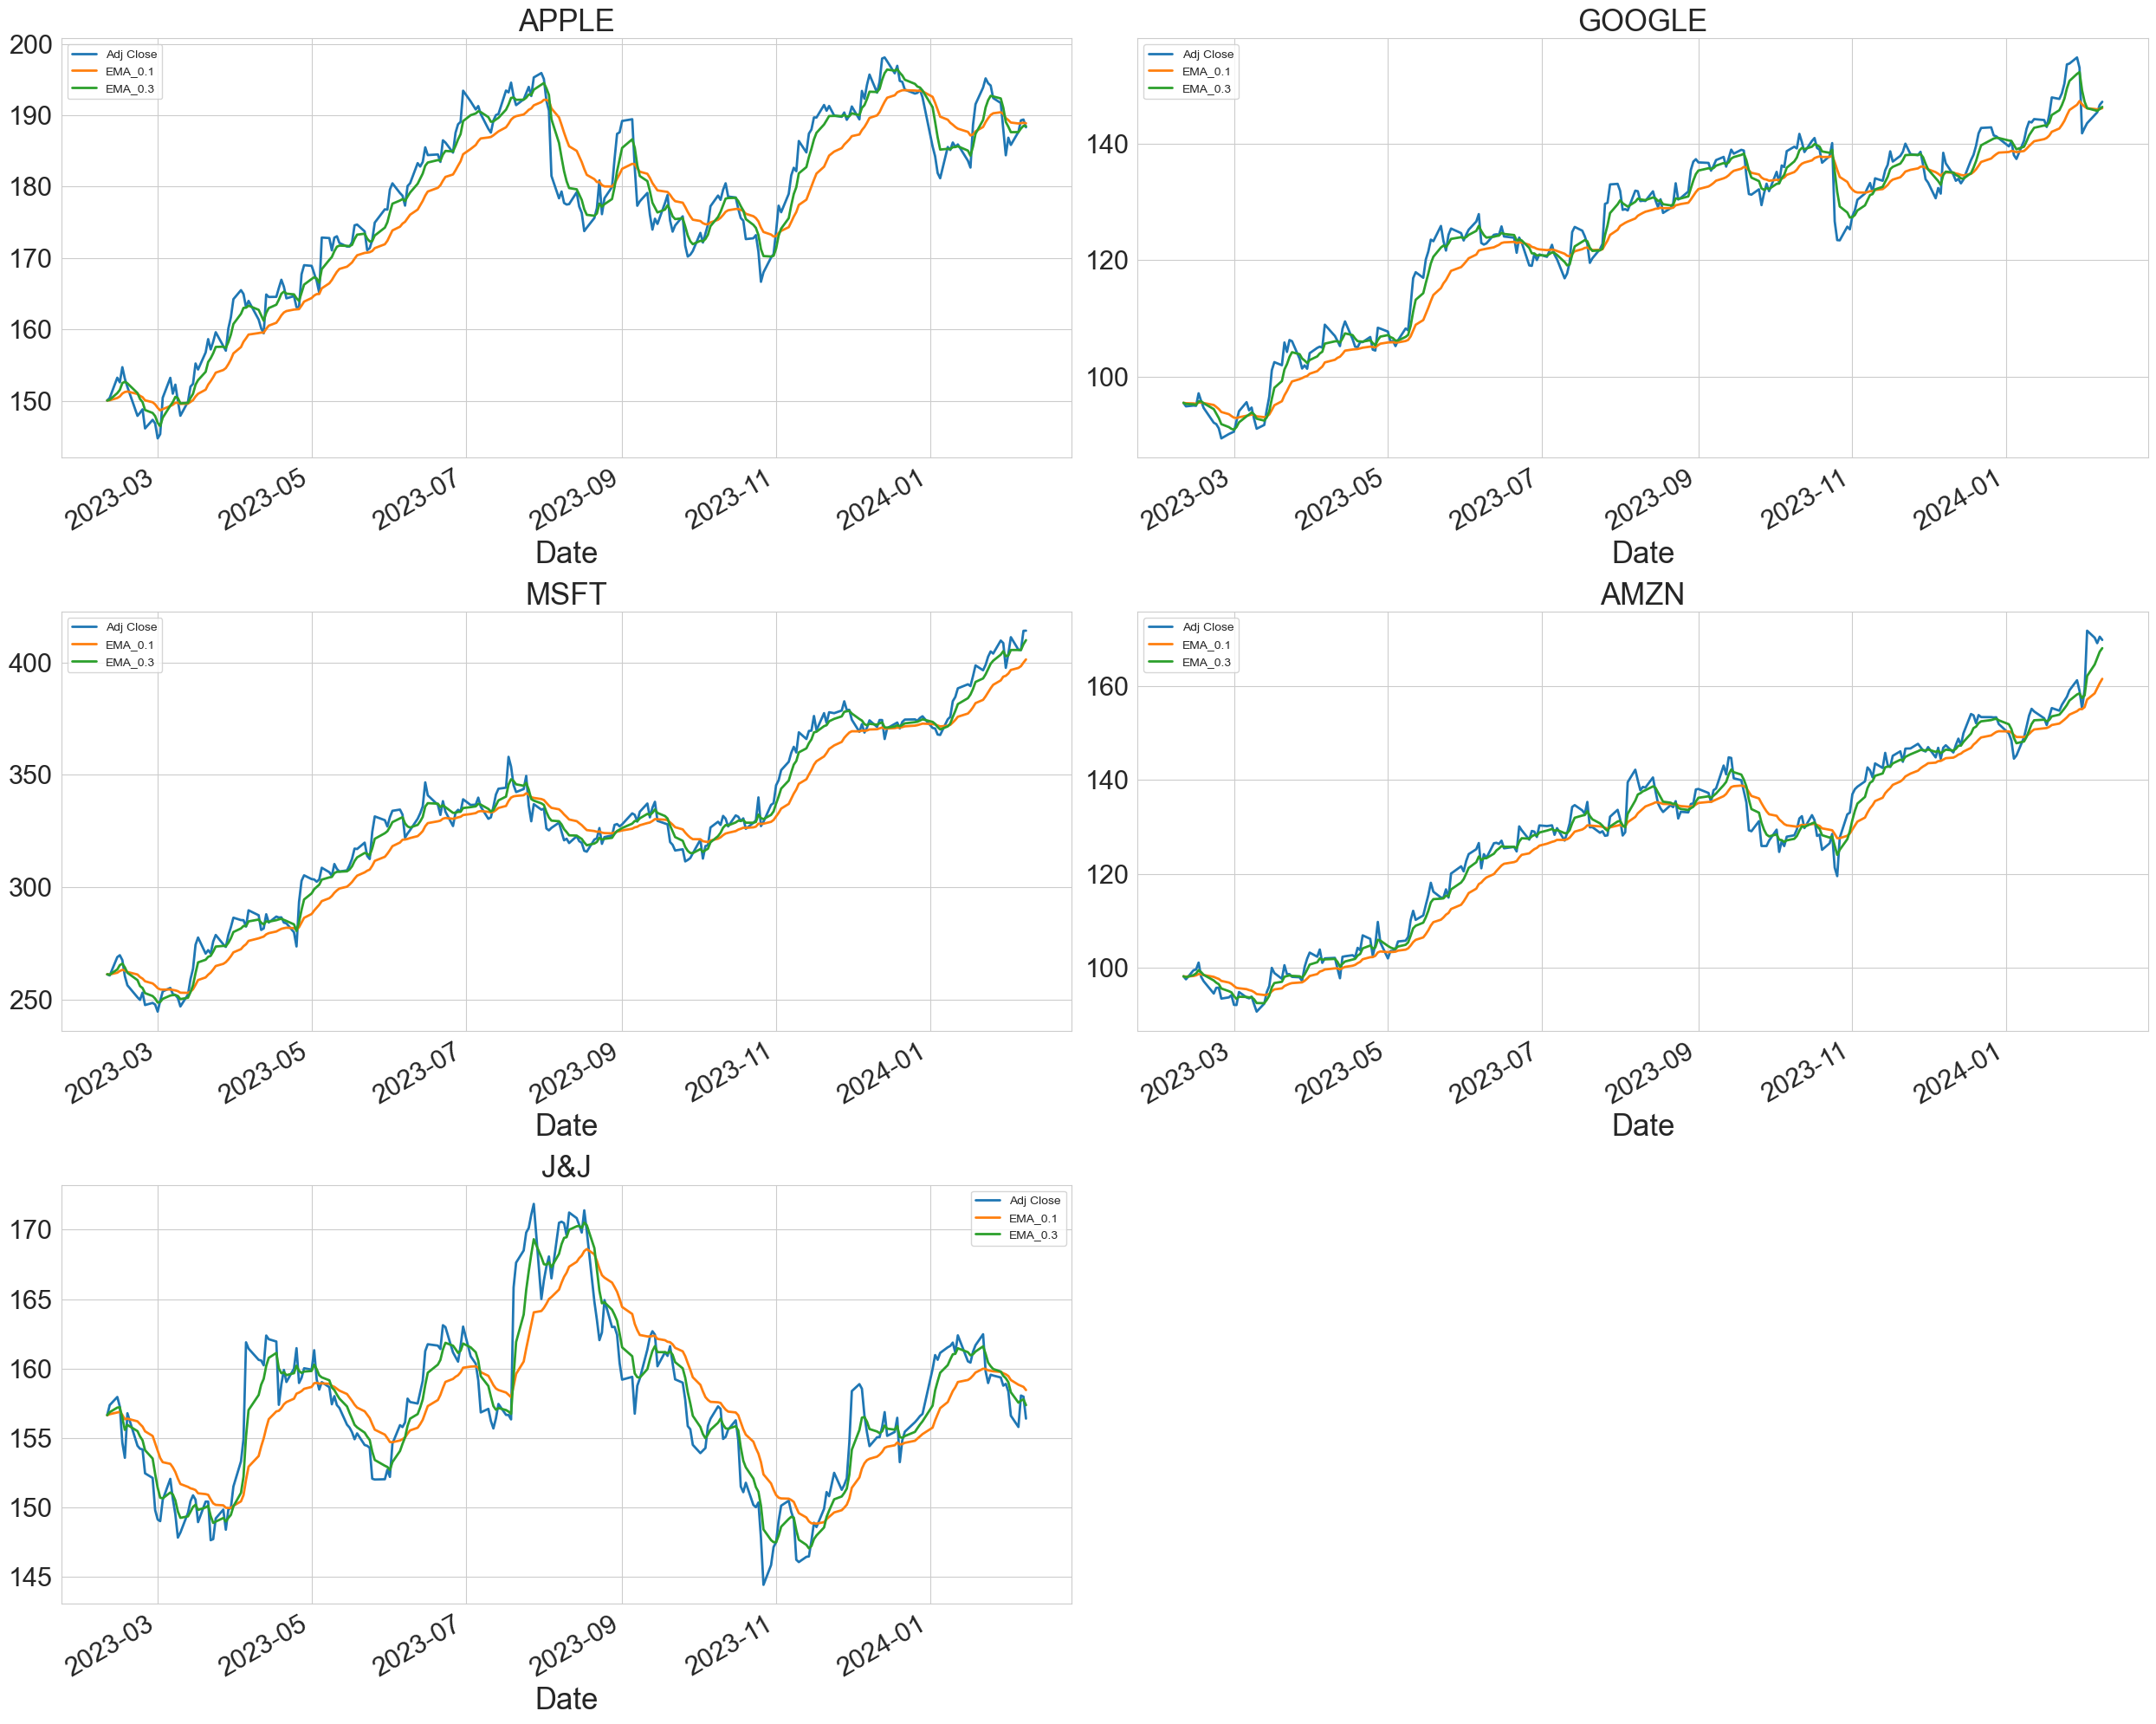

In [89]:
fig,axes = plt.subplots(nrows = 3,ncols = 2)
fig.set_figheight(20)
fig.set_figwidth(25)
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels

AAPL[['Adj Close','EMA_0.1','EMA_0.3']].plot(ax =axes[0,0],linewidth = 2)
axes[0,0].set_title("APPLE")
GOOG[['Adj Close','EMA_0.1','EMA_0.3']].plot(ax =axes[0,1],linewidth = 2)
axes[0,1].set_title("GOOGLE")
MSFT[['Adj Close','EMA_0.1','EMA_0.3']].plot(ax =axes[1,0],linewidth = 2)
axes[1,0].set_title("MSFT")
AMZN[['Adj Close','EMA_0.1','EMA_0.3']].plot(ax =axes[1,1],linewidth = 2)
axes[1,1].set_title("AMZN")
JNJ[['Adj Close','EMA_0.1','EMA_0.3']].plot(ax =axes[2,0],linewidth = 2)
axes[2,0].set_title("J&J")

plt.delaxes(axes[2][1])
plt.tight_layout()

# 0.3 :)

In [90]:
dff= pd.DataFrame()
MA_day = [10,20,30,40,50]

#company_list is list of indivisual variables of companies 
#company is each single comapny

for company in company_list:
    company['Date'] = company.index
    for ma in MA_day:    
        column_name = f'EMA_{ma}'
        company[column_name] = company['Adj Close'].ewm(span = ma, adjust = False).mean()

    dff = pd.concat([dff,company],axis = 0,ignore_index=True)
dff.set_index('Date',inplace=True)

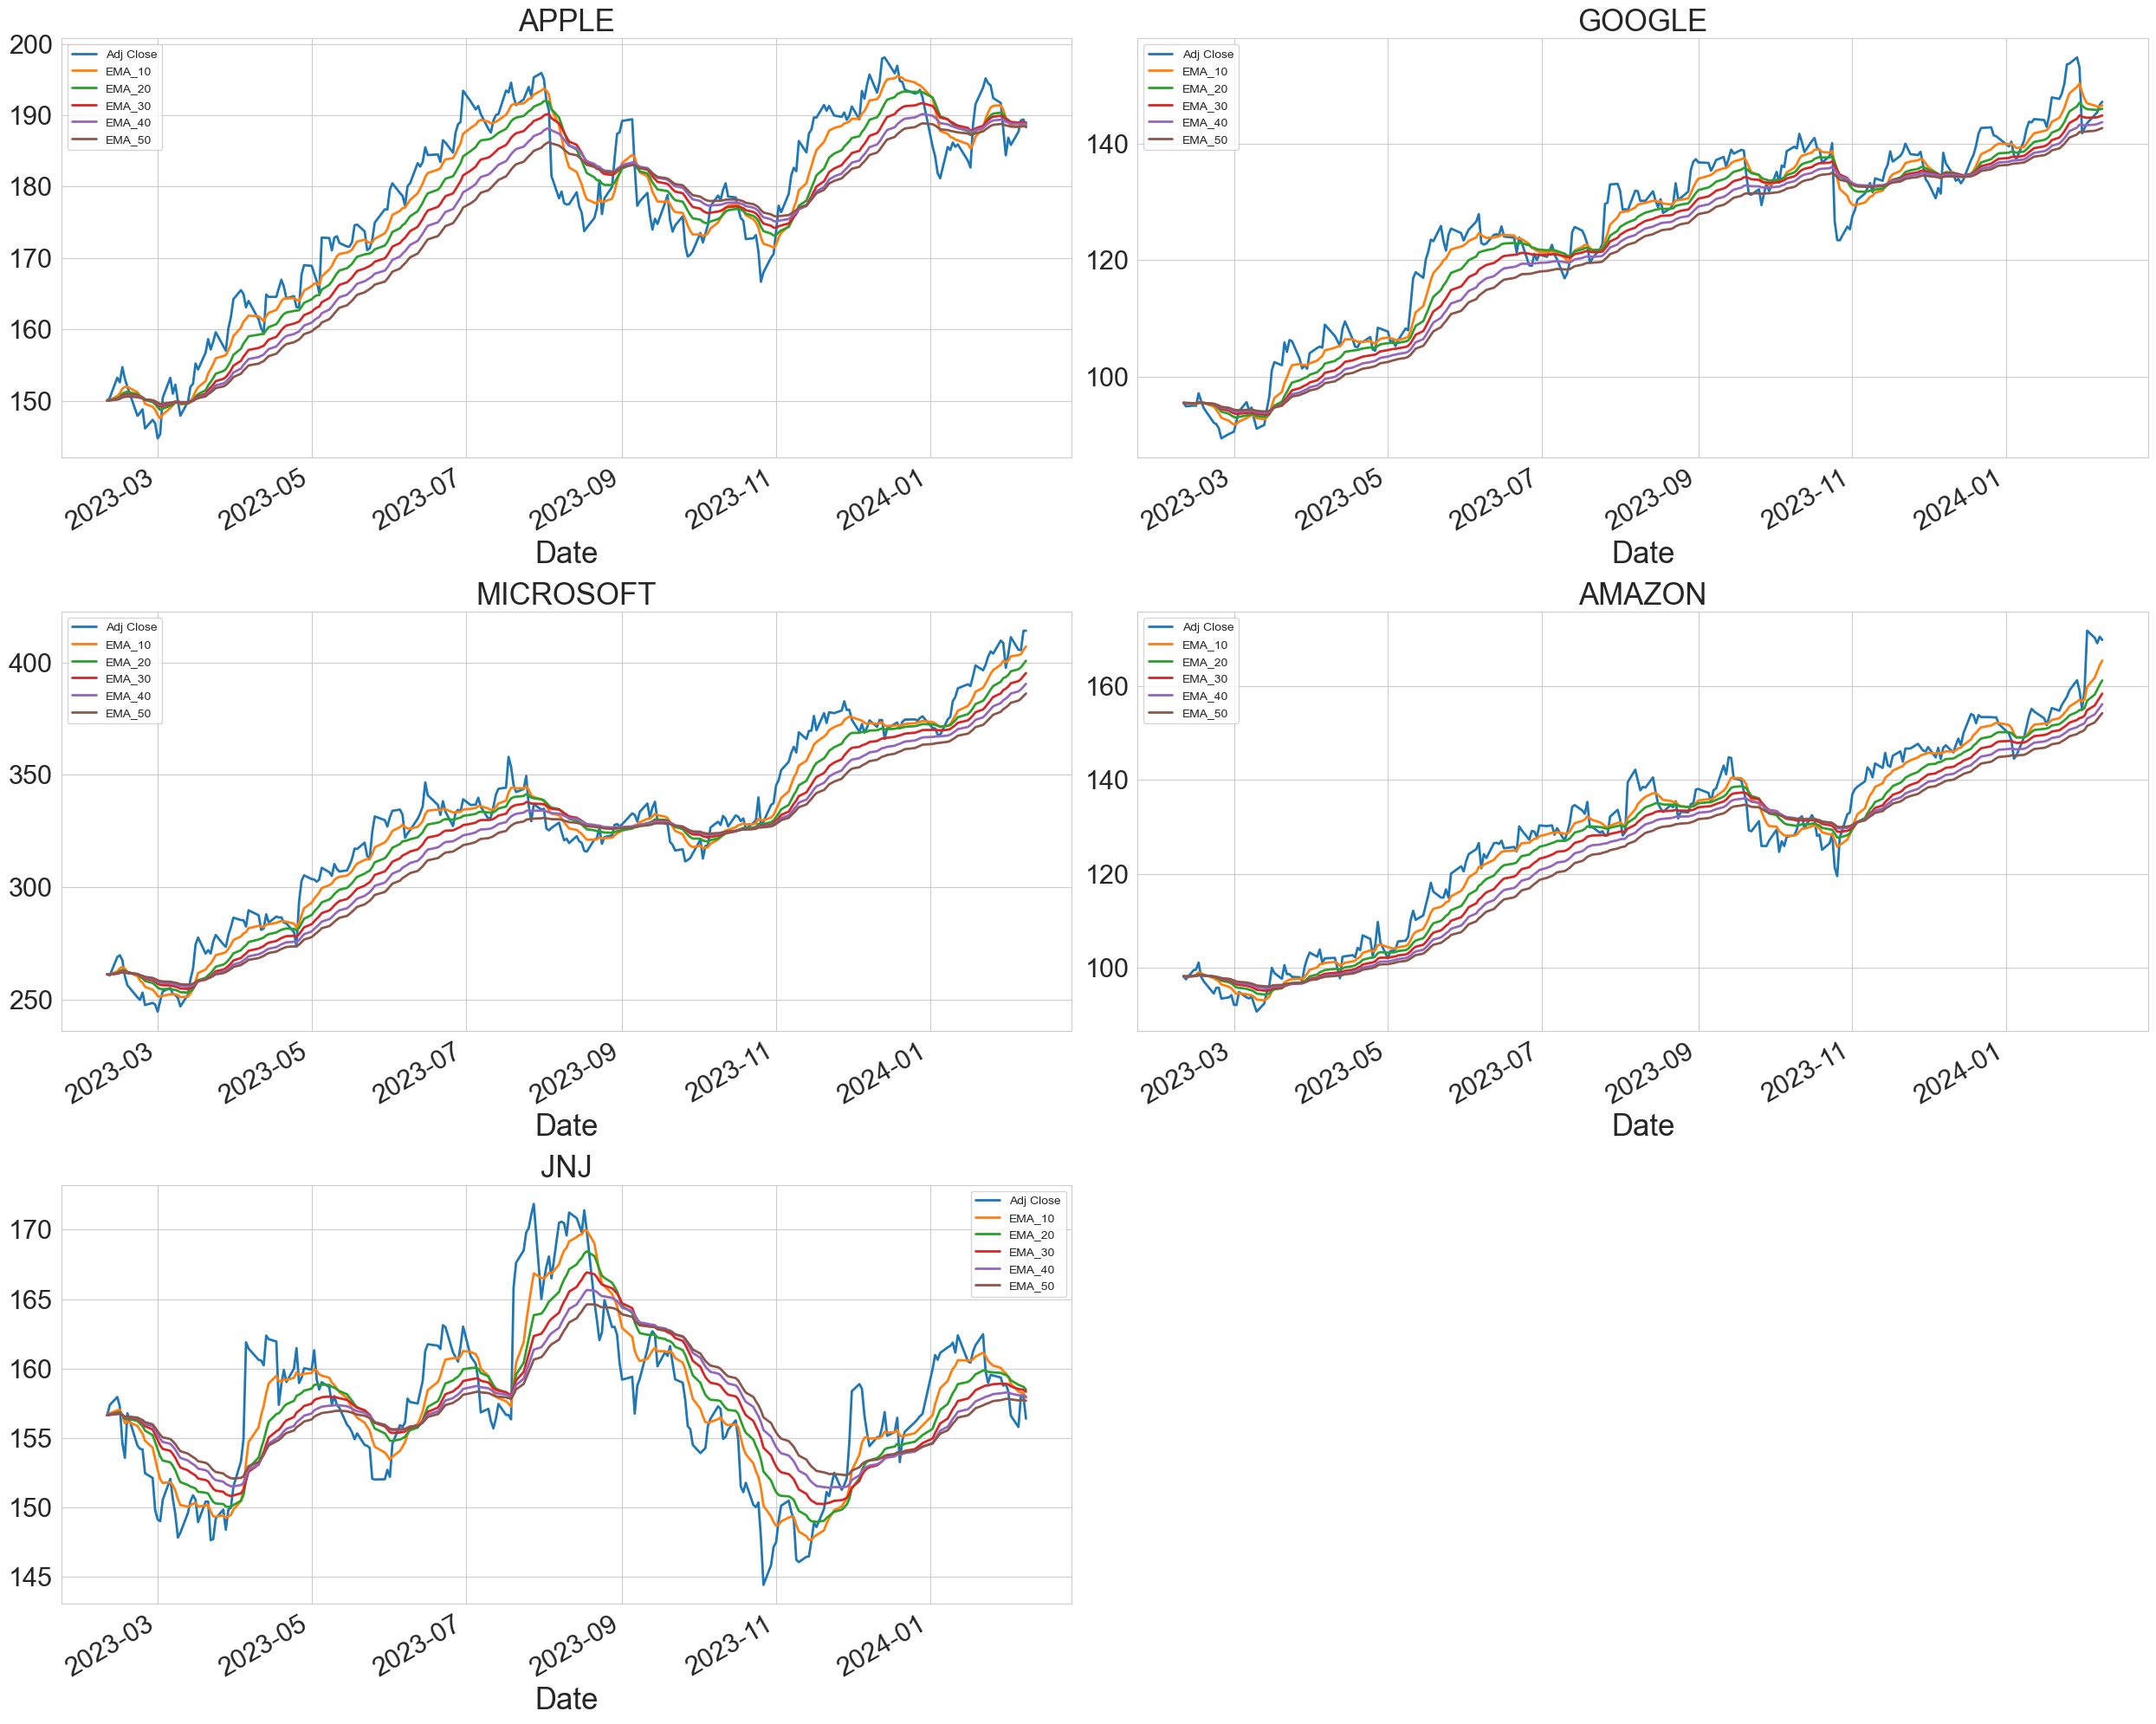

In [91]:
fig, axes = plt.subplots(nrows = 3,ncols = 2)
fig.set_figheight(20)
fig.set_figwidth(25)
plt.rc('axes', titlesize=25)     # fontsize of the axes title
plt.rc('axes', labelsize=25)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick label
plt.rc('ytick', labelsize=22)    # fontsize of the tick label

AAPL[['Adj Close','EMA_10','EMA_20','EMA_30','EMA_40','EMA_50']].plot(ax = axes[0,0],linewidth=2)
axes[0,0].set_title("APPLE")

GOOG[['Adj Close','EMA_10','EMA_20','EMA_30','EMA_40','EMA_50']].plot(ax = axes[0,1],linewidth=2)
axes[0,1].set_title("GOOGLE")

MSFT[['Adj Close','EMA_10','EMA_20','EMA_30','EMA_40','EMA_50']].plot(ax = axes[1,0],linewidth=2)
axes[1,0].set_title("MICROSOFT")

AMZN[['Adj Close','EMA_10','EMA_20','EMA_30','EMA_40','EMA_50']].plot(ax = axes[1,1],linewidth=2)
axes[1,1].set_title("AMAZON")

JNJ[['Adj Close','EMA_10','EMA_20','EMA_30','EMA_40','EMA_50']].plot(ax = axes[2,0],linewidth=2)
axes[2,0].set_title("JNJ")

fig.delaxes(axes[2][1])
fig.tight_layout()


In [92]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name,Date
Date,,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031387,56007100,APPLE,2023-02-09
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399902,57450700,APPLE,2023-02-10
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,2023-02-13
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,2023-02-14
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,2023-02-15
...,...,...,...,...,...,...,...,...
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,2024-02-02
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,2024-02-05
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,2024-02-06


In [93]:
data

,Open,High,Low,Close,Adj Close,Volume,company_name,Date,EMA_0.1,EMA_0.3
0,153.779999,154.330002,150.419998,150.869995,150.031387,56007100,APPLE,2023-02-09,150.031387,150.031387
1,149.460007,151.339996,149.220001,151.009995,150.399902,57450700,APPLE,2023-02-10,150.068239,150.141942
2,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,2023-02-13,150.384259,151.067891
3,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,2023-02-14,150.603938,151.521840
4,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,2023-02-15,151.013790,152.476024
...,...,...,...,...,...,...,...,...,...,...
1250,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,2024-02-02,159.177955,158.299034
1251,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,2024-02-05,158.840160,157.549325
1252,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,2024-02-06,158.762143,157.702527
1253,157.800003,159.369995,157.690002,157.979996,157.979996,8690300,J&J,2024-02-07,158.683929,157.785767


In [94]:
dff

,Open,High,Low,Close,Adj Close,Volume,company_name,EMA_0.1,EMA_0.3,EMA_10,EMA_20,EMA_30,EMA_40,EMA_50
Date,,,,,,,,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031387,56007100,APPLE,150.031387,150.031387,150.031387,150.031387,150.031387,150.031387,150.031387
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399902,57450700,APPLE,150.068239,150.141942,150.098390,150.066484,150.055162,150.049364,150.045839
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,150.384259,151.067891,150.667490,150.367623,150.259890,150.204441,150.170647
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,150.603938,151.521840,151.015411,150.578426,150.409643,150.320373,150.265173
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,151.013790,152.476024,151.685782,150.971190,150.686598,150.534133,150.439184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,159.177955,158.299034,158.909660,159.156723,158.720802,158.201312,157.788783
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,158.840160,157.549325,158.344268,158.837036,158.532363,158.084175,157.710792
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,158.762143,157.702527,158.292582,158.763032,158.501888,158.082996,157.724486


Strategy

In [98]:
def cal_ema(dff):
    dff['buy_signal'] = np.where(dff['EMA_10'] > dff['EMA_50'],1,0)
    dff['sell_signal'] = np.where(dff['EMA_10'] < dff['EMA_50'],1,0)
    dff['signal_EMA'] = np.where((dff['buy_signal'] == 1) & (dff['sell_signal'] == 0),1,0)
    dff['signal_EMA'] = np.where((dff['sell_signal'] == 1) & (dff['buy_signal'] == 0),0,dff['signal_EMA'])
    
    return dff

dfff = cal_ema(dff)

In [99]:
dfff

,Open,High,Low,Close,Adj Close,Volume,company_name,EMA_0.1,EMA_0.3,EMA_10,EMA_20,EMA_30,EMA_40,EMA_50,buy_signal,sell_signal,signal_EMA
Date,,,,,,,,,,,,,,,,,
2023-02-09,153.779999,154.330002,150.419998,150.869995,150.031387,56007100,APPLE,150.031387,150.031387,150.031387,150.031387,150.031387,150.031387,150.031387,0,0,0
2023-02-10,149.460007,151.339996,149.220001,151.009995,150.399902,57450700,APPLE,150.068239,150.141942,150.098390,150.066484,150.055162,150.049364,150.045839,1,0,1
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.228439,62199000,APPLE,150.384259,151.067891,150.667490,150.367623,150.259890,150.204441,150.170647,1,0,1
2023-02-14,152.119995,153.770004,150.860001,153.199997,152.581055,61707600,APPLE,150.603938,151.521840,151.015411,150.578426,150.409643,150.320373,150.265173,1,0,1
2023-02-15,153.110001,155.500000,152.880005,155.330002,154.702454,65573800,APPLE,151.013790,152.476024,151.685782,150.971190,150.686598,150.534133,150.439184,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J,159.177955,158.299034,158.909660,159.156723,158.720802,158.201312,157.788783,1,0,1
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J,158.840160,157.549325,158.344268,158.837036,158.532363,158.084175,157.710792,1,0,1
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J,158.762143,157.702527,158.292582,158.763032,158.501888,158.082996,157.724486,1,0,1


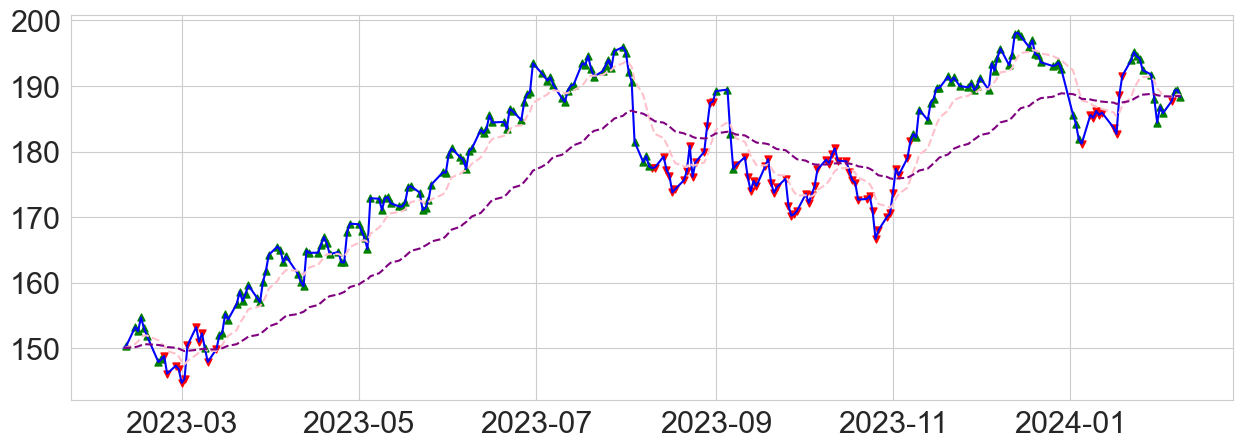

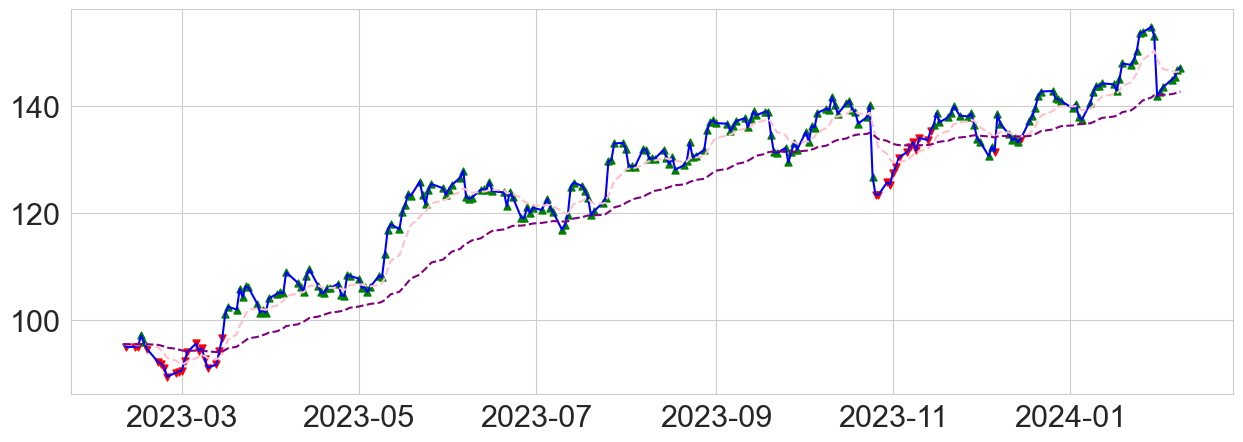

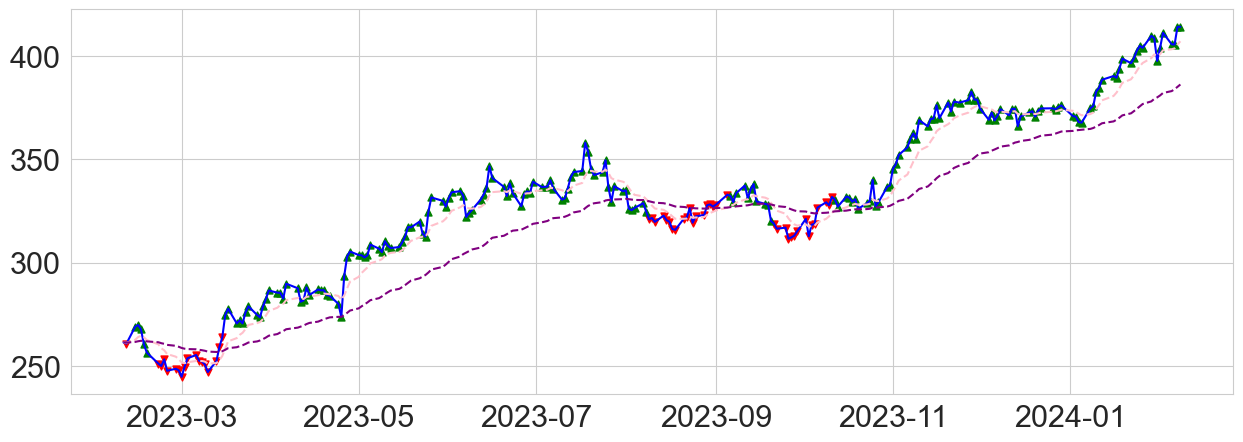

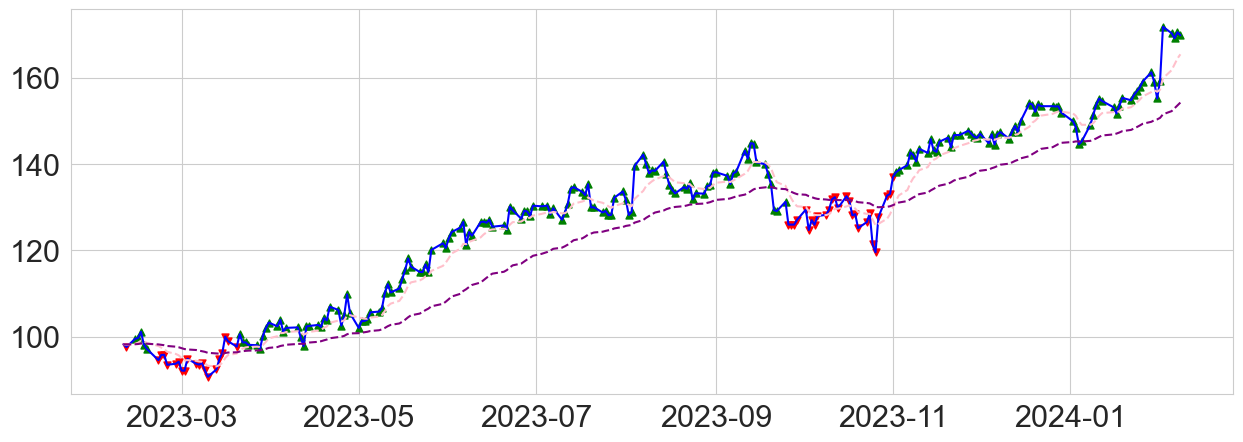

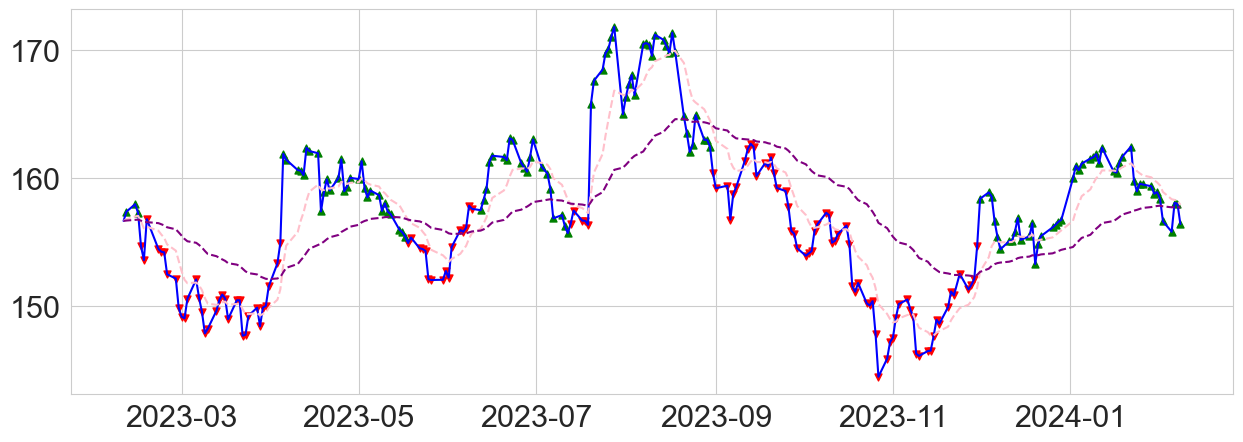

In [ ]:
for company in df['company_name'].unique():
    com_subset = df[df['company_name'] == company].copy()
    plt.figure(figsize=(15,5))
    plt.plot(com_subset['Adj Close'],label = "Adj Closing Price",color = 'blue')
    plt.plot(com_subset['EMA_10'],label = 'short-term EMA (10 Days)', color = 'pink',linestyle = '--')
    plt.plot(com_subset['EMA_50'],label = 'long-term EMA (50 Days)', color = 'purple',linestyle = '--')
    plt.scatter(com_subset[com_subset['sell_signal'] == 1].index,com_subset['Adj Close'][com_subset['sell_signal'] == 1],marker = 'v',color = 'red',label ='sell signal' , s =25)
    plt.scatter(com_subset[com_subset['buy_signal'] == 1].index,com_subset['Adj Close'][com_subset['buy_signal'] == 1],marker = '^',color = 'green',label ='buy signal' , s =25)